Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò: 569
feature Ïàò: 30
malignant (0) ÏÉòÌîå Í∞úÏàò: 212
benign (1) ÏÉòÌîå Í∞úÏàò: 357
Ï¥ùÌï©(ÏÉòÌîå Ïàò): 569 (Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò num_samples = 569)
Í≤∞Ï∏°Í∞í ÏóÜÏùå
mean radius ÌèâÍ∑†: 14.127291739894563
mean radius ÏµúÏÜåÍ∞í: 6.981
mean radius ÏµúÎåÄÍ∞í: 28.11


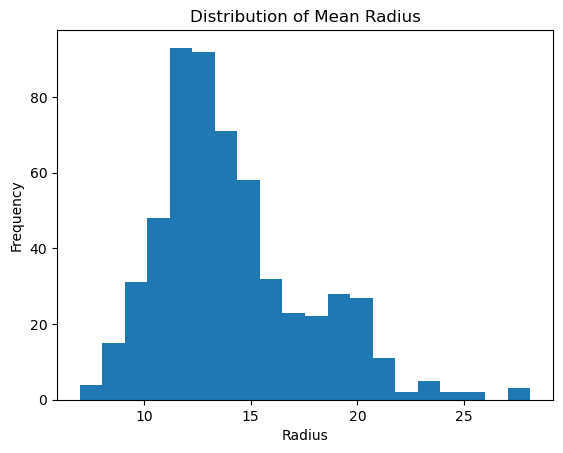

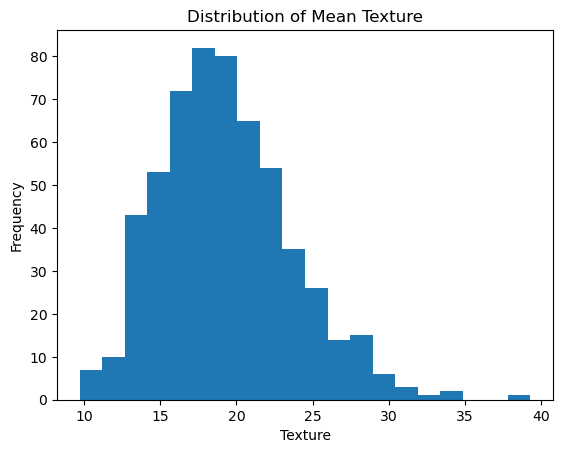

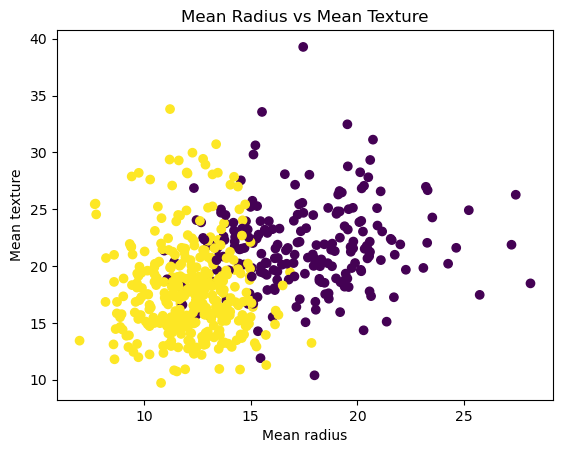

/var/folders/wj/tn1mgntj4nbfdhpy5v1b0gh00000gn/T/ipykernel_49367/1833513203.py:183: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([area_positive, area_negative], labels=["benign", "malignant"])


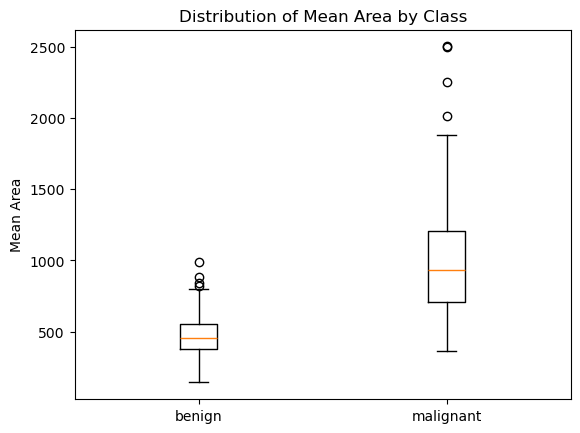

AUC: 0.9823931623931624


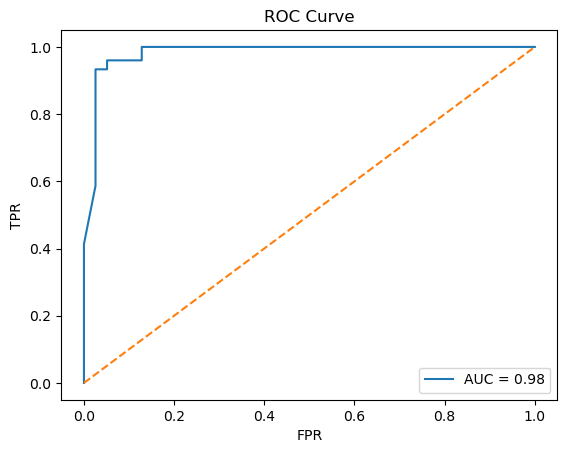

Ï†ïÌôïÎèÑ: 0.9385964912280702
ÌòºÎèô ÌñâÎ†¨:
 [[34  5]
 [ 2 73]]
Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.94      0.97      0.95        75

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Fitting 5 folds for each of 16 candidates, totalling 80 fits
ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ (Grid) {'max_depth': 50, 'n_estimators': 200}
ÏµúÍ≥† CV Ï†ïÌôïÎèÑ (Grid) : 0.9648351648351647
=== ÌäúÎãù Ï†Ñ Î™®Îç∏ ===
Ï†ïÌôïÎèÑ: 0.9385964912280702
ÌòºÎèô ÌñâÎ†¨:
 [[34  5]
 [ 2 73]]
Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.94      0.97      0.95        75

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94

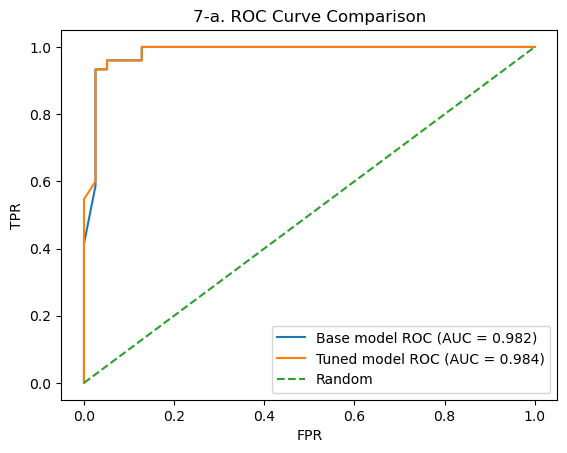

7-b. Í∞Å Î™®Îç∏Ïùò AUC ÎπÑÍµê
  - base model AUC : 0.982
  - tuned model AUC : 0.984


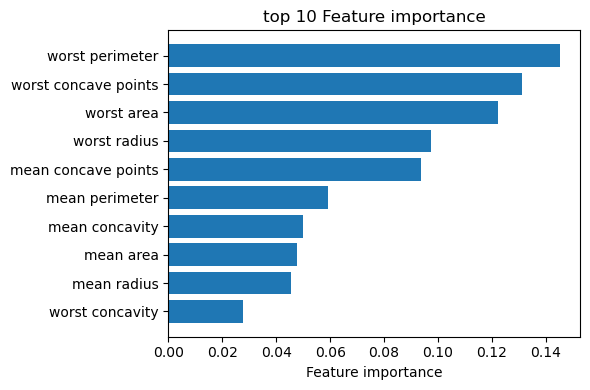

In [ ]:
# breast cancer Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
from sklearn.datasets import load_breast_cancer

# 1. Scikit-learnÏùò breast cancerÏùò Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§Í≥† summary ÌôïÏù∏ÌïòÍ∏∞
cancer = load_breast_cancer()
feature_names = cancer.feature_names
# print(feature_names)

# 1-a. Ï†ÑÏ≤¥ ÏÉòÌîå ÏàòÏôÄ feature Í∞úÏàòÎäî Í∞ÅÍ∞Å Î™á Í∞úÏù∏Í∞ÄÏöî?
# ÏÉòÌîå Ïàò, ÌäπÏÑ± Ïàò
data = cancer.data
num_samples = len(data)  # 569
num_features = len(data[0])  # 30
print(f"Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò: {num_samples}")  # print("Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò:", X.shape[0])
print(f"feature Ïàò: {num_features}")  # print("ÌäπÏÑ± Ïàò:", X.shape[1])

# 1-b. Target ÎùºÎ≤®(ÏñëÏÑ±/ÏïÖÏÑ±)Ïùò Î∂ÑÌè¨Î•º ÌôïÏù∏ÌïòÏÑ∏Ïöî
# ÏùºÎ∞òÏ†ÅÏúºÎ°úÎäî malignantÍ∞Ä positive, 1Î°ú ÌëúÍ∏∞ÎêòÎäîÎç∞ Ïó¨Í∏∞ÏóêÏÑúÎäî benignÏù¥ 1Î°ú ÌëúÍ∏∞Îê®
target = load_breast_cancer().target
counts = {0: 0, 1: 0}
for t in target:
    counts[t] += 1
print(f"malignant (0) ÏÉòÌîå Í∞úÏàò: {counts[0]}")  # 212
print(f"benign (1) ÏÉòÌîå Í∞úÏàò: {counts[1]}")  # 357
print(
    f"Ï¥ùÌï©(ÏÉòÌîå Ïàò): {counts[0] + counts[1]} (Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò num_samples = {num_samples})"
)  # 569

# 1-c. Í≤∞Ï∏° Í∞íÏù¥ ÏûàÎäî featureÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî
missing_count = 0

for row in data:
    for x in row:
        if x is None:
            found_missing = True
            missing_count += 1

if missing_count != 0:
    print("Í≤∞Ï∏°Í∞í Ï°¥Ïû¨")
else:
    print("Í≤∞Ï∏°Í∞í ÏóÜÏùå")

"""
X = data.data  # numpy arrayÏßÄÎßå Î¶¨Ïä§Ìä∏Ï≤òÎüº Î∞òÎ≥µ Í∞ÄÎä•

for i, row in enumerate(data):
    for j, feature in enumerate(row):
        if feature is None or str(feature).strip() in ["", "NA", "nan"]:
            print(f"Í≤∞Ï∏°Í∞í: row {i}, column {j}, value: {feature}")

# 1-c. Í≤∞Ï∏°Í∞í ÌôïÏù∏ (numpy ÏÇ¨Ïö©Ïãú)
if np.isnan(X).any():
    print("Í≤∞Ï∏°Í∞í Ï°¥Ïû¨")
else:
    print("Í≤∞Ï∏°Í∞í ÏóÜÏùå")

"""
# 1-d. ÌèâÍ∑†(mean) Í¥ÄÎ†® featureÎì§Ïùò Í∏∞Ïà† ÌÜµÍ≥Ñ(describe)Î•º ÌôïÏù∏ÌïòÍ≥† Ï£ºÏöî ÌäπÏßïÏùÑ Í∞ÑÎã®Ìûà ÏöîÏïΩÌïòÏÑ∏Ïöî

# [Ï£ºÏöî ÌäπÏßï ÏöîÏïΩ]
# 1. 'mean' Í¥ÄÎ†® featureÎì§ÏùÄ ÏÑ∏Ìè¨Ïùò ÌèâÍ∑†Ï†ÅÏù∏ ÌäπÏÑ±(Î∞òÍ≤Ω, ÎëòÎ†à, Î©¥Ï†Å Îì±)ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
# - ÌÅ¨Í∏∞Í¥ÄÎ†®Î≥ÄÏàò(ÌèâÍ∑† Î∞òÏßÄÎ¶Ñ, ÎëòÎ†à, Î©¥Ï†Å)Ïùò Î≥ÄÎèôÏÑ±ÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÌÅ∞Ìé∏.
# - ÌòïÌÉúÍ¥ÄÎ†®Î≥ÄÏàò (smooth, symm, fractal)ÏùÄ ÌèâÍ∑†Í∞íÏù¥ ÏûëÍ≥† Î≥ÄÎèôÏÑ±Ïù¥ Ï†ÅÏñ¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎπÑÍµêÏ†Å Í∑†ÏùºÌïòÍ≥† ÏïàÏ†ïÏ†Å.
# 2. Í∞Å featureÏùò 'mean' Í∞íÏùÄ ÎåÄÏ≤¥Î°ú ÏñëÏùò Í∞íÏùÑ Í∞ÄÏßÄÎ©∞, Ïù¥Îäî Î¨ºÎ¶¨Ï†ÅÏù∏ Ï∏°Ï†ïÍ∞íÏùÑ ÎÇòÌÉÄÎÇ¥Í∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.
# 3. ÌëúÏ§Ä Ìé∏Ï∞®(std)Î•º ÌÜµÌï¥ Í∞Å featureÏùò Í∞íÎì§Ïù¥ ÏñºÎßàÎÇò ÌçºÏ†∏ÏûàÎäîÏßÄ Ïïå Ïàò ÏûàÏúºÎ©∞, Ïù¥Îäî ÏßÑÎã®Ïóê Ï§ëÏöîÌïú ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÏäµÎãàÎã§.
# 4. ÏòàÎ•º Îì§Ïñ¥, 'radius_mean'ÏùÄ ÌèâÍ∑† Î∞òÍ≤ΩÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞, Ïù¥ Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÏïÖÏÑ± Ï¢ÖÏñëÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
# 5. ÌåêÎã§Ïä§ ÏÇ¨Ïö©Ïãú describe() Í≤∞Í≥ºÏóêÏÑú Í∞Å featureÏùò ÏµúÏÜüÍ∞í, ÏµúÎåìÍ∞í, 25/50/75 Î∞±Î∂ÑÏúÑÏàòÎ•º ÌÜµÌï¥ Í∞íÏùò Î∂ÑÌè¨Î•º Îçî ÏÉÅÏÑ∏ÌïòÍ≤å ÌååÏïÖÌï† Ïàò ÏûàÏäµÎãàÎã§.

feature_index = list(feature_names).index("mean radius")
radius = [row[feature_index] for row in data]
mean_radius = sum(radius) / len(radius)
min_radius, max_radius = min(radius), max(radius)
print("mean radius ÌèâÍ∑†:", mean_radius)
print("mean radius ÏµúÏÜåÍ∞í:", min_radius)
print("mean radius ÏµúÎåÄÍ∞í:", max_radius)
# print(sum(radius)) 8038.429000000006
# print(len(radius)) 569
# print(mean_radius) 14.127291739894563
# print(min_radius) 6.981
# print(max_radius) 28.11

""""
print(df[mean_cols].describe()) <- ÌåêÎã§Ïä§ ÏÇ¨Ïö©Ïãú Î≥ÑÎèÑÏùò Í∏∞Ïà†ÌÜµÍ≥ÑÎ•º ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò: 569
Feature Í∞úÏàò: 30

Target Î∂ÑÌè¨:
target
ÏñëÏÑ±    357
ÏïÖÏÑ±    212
Name: count, dtype: int64

Í≤∞Ï∏°Í∞í Í∞úÏàò: 0

ÌèâÍ∑† Í¥ÄÎ†® ÌîºÏ≤ò Í∏∞Ïà† ÌÜµÍ≥Ñ:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
...
25%         0.161900                0.057700  
50%         0.179200                0.061540  
75%         0.195700                0.066120  
max         0.304000                0.097440  
"""

# ------------------------------------------------
# 2. Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

# texture
feature_index_texture = list(feature_names).index("mean texture")
texture = [row[feature_index_texture] for row in data]
# 2-a. mean radius, mean textureÏùò Î∂ÑÌè¨Î•º ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî
plt.hist(radius, bins=20)
plt.title("Distribution of Mean Radius")
plt.xlabel("Radius")
plt.ylabel("Frequency")
plt.show()

plt.hist(texture, bins=20)
plt.title("Distribution of Mean Texture")
plt.xlabel("Texture")
plt.ylabel("Frequency")
plt.show()

# 2-b. mean raidusÏôÄ mean textureÏùò ÏÇ∞Ï†êÎèÑÎ•º Í∑∏Î¶¨Í≥†, targetÎ≥ÑÎ°ú ÏÉâÍπîÏùÑ Îã§Î•¥Í≤å Íµ¨Î∂ÑÌïòÏÑ∏Ïöî
plt.scatter(radius, texture, c=target)
plt.title("Mean Radius vs Mean Texture")
plt.xlabel("Mean radius")
plt.ylabel("Mean texture")
# plt.colorbar(label="Target (0=malignant, 1=benign)")
plt.show()

"""
Ïó∞ÏÜçÏ†ÅÏù∏ Í∞íÏù¥ ÏïÑÎãå Ïù¥ÏßÑÎ≤îÏ£ºÌòïÏùºÍ≤ΩÏö∞ ÏïÑÎûò Ïù¥Ïö©(numpyÏù¥Ïö© Í∂åÏû•)
X = cancer.data
y = cancer.target
texture_idx = list(feature_names).index("mean texture")
texture = X[:, texture_idx]
radius_idx = list(feature_names).index("mean radius")
radius = X[:, radius_idx]
plt.scatter(
    radius[y == 0],
    texture[y == 0],
    color="red",
    alpha=0.7,
    label="Malignant (0)",
)
plt.scatter(
    radius[y == 1],
    texture[y == 1],
    color="blue",
    alpha=0.7,
    label="Benign (1)",
)
plt.title("Mean Radius vs Mean Texture")
plt.xlabel("Mean radius")
plt.ylabel("Mean texture")
plt.legend(loc="upper right")
plt.show()
"""

# 2-c. target ÎùºÎ≤® Î≥ÑÎ°ú mean areaÏùò Î∂ÑÌè¨ Ï∞®Ïù¥Î•º Î∞ïÏä§ÌîåÎ°ØÏúºÎ°ú ÎÇòÌÉÄÎÇ¥ÏÑ∏Ïöî
area_idx = list(feature_names).index("mean area")
area_positive = []  # target == 1 (benign)
area_negative = []  # target == 0 (malignant)
for row, t in zip(data, target):
    if t == 1:
        area_positive.append(row[area_idx])
    else:
        area_negative.append(row[area_idx])
plt.boxplot([area_positive, area_negative], labels=["benign", "malignant"])
plt.title("Distribution of Mean Area by Class")
plt.ylabel("Mean Area")
plt.show()
# area = X[:, area_idx]
# plt.boxplot([area[y == 1], area[y == 0]], labels=["benign", "malignant"])

# 3. Î®∏Ïã†Îü¨Îãù Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
from sklearn.model_selection import train_test_split

# 3-a. Î™®Îç∏ÎßÅÏùÑ ÏúÑÌï¥ ÌïôÏäµÎç∞Ïù¥ÌÑ∞(Train)Í≥º ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(Test)Î°ú ÎÇòÎàÑÏÑ∏Ïöî
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
# cancer = load_breast_cancer()

X = cancer.data  # 2Ï∞®Ïõê Ïà´Ïûê Î≠âÏπò 569√ó30
y = cancer.target  # 1Ï∞®Ïõê Ïà´Ïûê Î≠âÏπò 569Í∞ú

# Target sizeÎäî 20%Î°ú ÏÑ§Ï†ïÌïòÍ≥†, random_stateÎäî 77Î°ú Í≥†Ï†ï
# random_state=77 ‚Üí Îß§Î≤à ÎòëÍ∞ôÏù¥ ÎÇòÎâòÎèÑÎ°ù seed(ÎÇúÏàò Î∞úÏÉùÍ∏∞) Í≥†Ï†ï
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=77
)
# print("train:", len(X_train))
# print("test:", len(X_test))

# 4. Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌÖåÏä§Ìä∏ Í≤∞Í≥º ÌôïÏù∏
from sklearn.ensemble import RandomForestClassifier

# 4-a. RandomForestClassifierÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Train dataÎ•º Í∏∞Î∞òÏúºÎ°ú Î∂ÑÎ•ò Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§ÏÑ∏Ïöî
# ÎÇòÎ¨¥(Decision Tree)Î•º ÏàòÏã≠ Í∑∏Î£® Ïã¨Ïñ¥ÏÑú Ïà≤(Forest)ÏùÑ ÎßåÎìúÎäî Í≤É
# Í∞Å ÎÇòÎ¨¥Í∞Ä ‚ÄúÏù¥ ÏÉòÌîåÏùÄ ÏïÖÏÑ±Ïù∏Í∞Ä ÏñëÏÑ±Ïù∏Í∞Ä?‚ÄùÎ•º Î∞∞Ïö∞ÎèÑÎ°ù ÌõàÎ†®ÏãúÌÇ§Îäî Í≥ºÏ†ï
clf = RandomForestClassifier(random_state=77)
clf.fit(X_train, y_train)

# 4-b. ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÍ≥†, ÏïÑÎûòÏùò ÌèâÍ∞ÄÏßÄÌëúÎ•º Ï∂úÎ†•ÌïòÏÑ∏Ïöî (Î™®Îç∏Ïù¥ ÏñºÎßàÎÇò Ïûò ÏòàÏ∏°ÌñàÎäîÏßÄ Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú® ÌèâÍ∞Ä)
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_curve,
)

# ÏãúÌóòÏö© Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
y_pred = clf.predict(X_test)  # 0/1 Î∂ÑÎ•ò Í≤∞Í≥º
y_proba = clf.predict_proba(X_test)[:, 1]  # ÏñëÏÑ±(1)Ïùº ÌôïÎ•†

# ROC Í≥°ÏÑ†Í≥º AUC Í≥ÑÏÇ∞
# ROC Í≥°ÏÑ†: ‚ÄúÌôïÎ•† Í∏∞Ï§Ä‚ÄùÏùÑ Îã¨Î¶¨ÌñàÏùÑ Îïå TPRÍ≥º FPRÏù¥ Ïñ¥ÎñªÍ≤å Î≥ÄÌïòÎäîÏßÄ / AUC: Í≥°ÏÑ† ÏïÑÎûò Î©¥Ï†Å, 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï¢ãÏùå
# fpr:ÏïîÏïÑÎãåÎç∞ ÏïîÏù¥ÎùºÍ≥†Ìïú ÎπÑÏú®, tpr:ÏïîÏù¥ÎùºÍ≥† ÏßÑÏßú ÎßûÏ∂òÎπÑÏú®
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# ROC Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "--")  # ÎåÄÍ∞ÅÏÑ†
plt.xlabel("FPR")  # Í±∞Ïßì ÏñëÏÑ± ÎπÑÏú®
plt.ylabel("TPR")  # Ï∞∏ ÏñëÏÑ± ÎπÑÏú®
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Ï†ïÌôïÎèÑ(Accuracy): ÎßûÏ∂ò ÎπÑÏú®(accuracy)ÏùÑ Í≥ÑÏÇ∞
acc = accuracy_score(y_test, y_pred)
print("Ï†ïÌôïÎèÑ:", acc)

# ÌòºÎèô ÌñâÎ†¨(Confusion Matrix)
# ÏôºÏ™Ω ÏúÑ: ÏßÑÏßú ÏïÖÏÑ±ÏùÑ ÏïÖÏÑ±Ïù¥Îùº ÎßûÏ∂ò Í∞ØÏàò / Ïò§Î•∏Ï™Ω ÏïÑÎûò: ÏßÑÏßú ÏñëÏÑ±ÏùÑ ÏñëÏÑ±Ïù¥Îùº ÎßûÏ∂ò Í∞ØÏàò / ÎÇòÎ®∏ÏßÄÎäî ‚ÄúÌãÄÎ¶∞ Í≤ΩÏö∞‚Äù
cm = confusion_matrix(y_test, y_pred)
print("ÌòºÎèô ÌñâÎ†¨:\n", cm)
# TP  FN
# FN  TP
# TN (True Negative): Ïã§Ï†ú ÏïîÏù¥ ÏïÑÎãåÎç∞ Ïïî ÏïÑÎãàÎùºÍ≥† ÏòàÏ∏°Ìïú Í∞úÏàò
# FP (False Positive): Ïã§Ï†ú ÏïîÏù¥ ÏïÑÎãåÎç∞ ÏïîÏù¥ÎùºÍ≥† ÏòàÏ∏°Ìïú Í∞úÏàò
# FN (False Negative): Ïã§Ï†ú ÏïîÏù∏Îç∞ Ïïî ÏïÑÎãàÎùºÍ≥† ÏòàÏ∏°Ìïú Í∞úÏàò
# TP (True Positive): Ïã§Ï†ú ÏïîÏù∏Îç∞ ÏïîÏù¥ÎùºÍ≥† ÏòàÏ∏°Ìïú Í∞úÏàò

# Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏(Classification Report)
# Precision(Ï†ïÎ∞ÄÎèÑ): ‚ÄúÏñëÏÑ±Ïù¥ÎùºÍ≥† Ìïú Í≤É Ï§ë Ïò≥ÏùÄ ÎπÑÏú®‚Äù / Recall(Ïû¨ÌòÑÏú®): ‚ÄúÏßÑÏßú ÏñëÏÑ± Ï§ë ÎßûÏ∂ò ÎπÑÏú®‚Äù / F1-score: Îëê Í∞úÎ•º ÏÑûÏùÄ Ï¢ÖÌï© Ï†êÏàò
clf_report = classification_report(y_test, y_pred)
print("Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:\n", clf_report)

# 5. ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 5-a. GridSearchCV ÎòêÎäî RandomizedSearchCVÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏Ïùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏµúÏ†ÅÌôîÏãúÌÇ§ÏÑ∏Ïöî
# GridSearchCV
# GridSearchCVÎäî ‚ÄòÌïòÎÇòÏî© ÏòµÏÖò Ï°∞Ìï© Îã§ Ìï¥ Î≥¥Í≥†‚Äô cross-validation(CV) ÏúºÎ°ú ÏÑ±Îä•(accuracy)ÏùÑ ÎπÑÍµêÌï¥ÏÑú ‚ÄòÏ†úÏùº Ï¢ãÏùÄ ÏòµÏÖò‚ÄôÏùÑ Ï∞æÏïÑÏ§å

# Ïö∞Î¶¨Í∞Ä ÎπÑÍµêÌï¥ Î≥º ÏòµÏÖò(ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞) ÎîïÏÖîÎÑàÎ¶¨ ÎßåÎì§Í∏∞
param_grid = {
    "n_estimators": [10, 50, 100, 200],  # Ïà≤ ÏÜç ÎÇòÎ¨¥ Í∞úÏàò ÏòµÏÖò
    "max_depth": [1, 50, 100, 200],  # ÎÇòÎ¨¥Ïùò ÏµúÎåÄ ÍπäÏù¥ ÏòµÏÖò
}
"""
# "min_samples_split": list(range(1, 10, 2)), : Í∞ÄÏßÄÎ•º ÎÇòÎàå ÏµúÏÜå ÏÉòÌîå Í∞úÏàò ÏòµÏÖò
# "min_samples_leaf": [1, 2, 4], : Î¶¨ÌîÑ ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏÉòÌîå Ïàò
# "bootstrap": [True, False], : Î∂ÄÌä∏Ïä§Ìä∏Îû© ÏÉòÌîåÎßÅ Ïó¨Î∂Ä Í∏∞Î≥∏Í∞íÏùÄ True
"""

# RandomForest Î™®Îç∏Í≥º GridSearchCV Ï§ÄÎπÑ
# CV(Cross-Validation) Îç∞Ïù¥ÌÑ∞Î•º Ïó¨Îü¨ Ï°∞Í∞Å(Ïòà: 5Í∞ú)ÏúºÎ°ú ÎÇòÎà†ÏÑú
# Ìïú Ï°∞Í∞ÅÏî© Î≤àÍ∞àÏïÑÍ∞ÄÎ©∞ ÏãúÌóòÏö©(Test)ÏúºÎ°ú Ïì∞Í≥† ÎÇòÎ®∏ÏßÄÎ°ú ÌïôÏäµÌïòÎäî Í≥ºÏ†ïÏùÑ Î∞òÎ≥µ Î™®Îç∏ ÏÑ±Îä•ÏùÑ Í≥µÏ†ïÌïòÍ≤å ÌèâÍ∞Ä
# ÏÇ¨ÎûåÏù¥ ÌïòÎÇòÌïòÎÇò Îã§ Ìï¥ Î≥¥Í∏∞ ÌûòÎì† ÎßéÏùÄ Ï°∞Ìï©ÏùÑ ÏûêÎèôÏúºÎ°ú ÏãúÌóòÌï¥ Î≥¥Í≥† Ïã∂ÏùÑ Îïå ÏÇ¨Ïö©
base_clf = RandomForestClassifier(random_state=77)
grid = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    cv=5,  # Îç∞Ïù¥ÌÑ∞Î•º 5Ï°∞Í∞ÅÏúºÎ°ú ÎÇòÎà†ÏÑú 5Î≤à Í≤ÄÏ¶ù
    scoring="accuracy",  # Ï†ïÌôïÎèÑÎ°ú Ï†úÏùº ÎÜíÏùÄ ÏòµÏÖòÏùÑ Ï∞æÏùå
    n_jobs=-1,  # ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îì† CPUÏΩîÏñ¥Î•º ÏÇ¨Ïö©Ìï¥ Î≥ëÎ†¨Î°ú Í≥ÑÏÇ∞ÏùÑ ÏàòÌñâÌïòÏãúÏò§
    verbose=1,  # ÌäúÎãù ÏßÑÌñâ ÏÉÅÌô©ÏùÑ ÏûêÏÑ∏Ìûà Ï∂úÎ†•
)
"""
# estimator=model_for_tuning : Ïñ¥Îñ§ Î™®Îç∏Ïùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÌäúÎãùÌï†Í±¥ÏßÄ?
# param_grid=param_grid : ÏúÑÏóêÏÑú Ï†ïÏùòÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨ÎìúÎ•º Ï†ÑÎã¨
# cv=5 : 5-fold ÍµêÏ∞®Í≤ÄÏ¶ù (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º 5Í∞úÏùò Ìè¥ÎìúÎ°ú ÎÇòÎàÑÏñ¥ 5Î≤àÏùò ÌõàÎ†®Í≥º Í≤ÄÏ¶ùÏùÑ Î∞òÎ≥µÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞Ä)
# scoring='accuracy' : Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Ï†ïÌôïÎèÑÎ°ú ÌèâÍ∞Ä
"""

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú ÏòµÏÖòÎ≥ÑÎ°ú Î™®Îç∏ ÌïôÏäµ Î∞è ÍµêÏ∞®Í≤ÄÏ¶ù
grid.fit(X_train, y_train)

# Í∞ÄÏû• Ï¢ãÏùÄ ÏòµÏÖòÍ≥º Í∑∏ÎïåÏùò ÍµêÏ∞®Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ Ï∂úÎ†•
print("ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ (Grid)", grid.best_params_)
print("ÏµúÍ≥† CV Ï†ïÌôïÎèÑ (Grid) :", grid.best_score_)

"""
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌõÑÎ≥¥ Ï†ïÌïòÍ∏∞ (Ïó¨Îü¨ Ï°∞Ìï© Ï§ëÏóêÏÑú ÎûúÎç§ÏúºÎ°ú ÏÑ†ÌÉùÌï¥ÏÑú ÌÖåÏä§Ìä∏)
param_dist = {
    "n_estimators": [50, 100, 200],  # ÎÇòÎ¨¥ Í∞úÏàò
    "max_depth": [None, 5, 10, 20],  # ÎÇòÎ¨¥Ïùò ÏµúÎåÄ ÍπäÏù¥
    "min_samples_split": [2, 5, 10],  # ÎÇòÎ≠áÍ∞ÄÏßÄ ÎÇòÎàå ÏµúÏÜå ÏÉòÌîå Ïàò
    "min_samples_leaf": [1, 2, 4],  # ÎÅù ÏûéÏÇ¨Í∑Ä ÎÖ∏ÎìúÏóê ÌïÑÏöîÌïú ÏµúÏÜå ÏÉòÌîå Ïàò
    "bootstrap": [True, False],  # ÏÉòÌîåÏùÑ Î≥µÏõêÌï¥ÏÑú ÎΩëÏùÑÏßÄ Ïó¨Î∂Ä
}

# RandomizedSearchCV (ÎûúÎç§ÌïòÍ≤å Î™á Í∞úÎßå Í≥®ÎùºÏÑú ÏãúÌóò)
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # ÎûúÎç§ÏúºÎ°ú 10Î≤à ÏãúÎèÑÌï¥Î≥¥Í∏∞
    cv=5,  # ÍµêÏ∞®Í≤ÄÏ¶ù (5Î≤à ÎÇòÎà†ÏÑú ÌèâÍ∑†)
    verbose=2,
    random_state=42,
    n_jobs=-1,  # Í∞ÄÎä•Ìïú Î™®Îì† CPU ÏÇ¨Ïö©
)

# ÌïôÏäµÏãúÌÇ§Í∏∞
random_search.fit(X_train, y_train)

# ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ÏôÄ ÏµúÍ≥† Ï†êÏàò Ï∂úÎ†•
print("ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞(R):", random_search.best_params_)
print("ÏµúÍ≥† ÍµêÏ∞®Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ(R): {:.4f}".format(random_search.best_score_))
"""

# 6. ÏµúÏ¢Ö Î™®Îç∏Ïùò ÏÑ±Îä• ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- a) ÌäúÎãù Ï†Ñ Î™®Îç∏Î°ú ÌèâÍ∞Ä ---
print("=== ÌäúÎãù Ï†Ñ Î™®Îç∏ ===")
# 1) ÌïôÏäµ
base_clf.fit(X_train, y_train)
# 2) ÏòàÏ∏°
y_pred_base = base_clf.predict(X_test)
# 3) ÏßÄÌëú Ï∂úÎ†•
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, y_pred_base))
print("ÌòºÎèô ÌñâÎ†¨:\n", confusion_matrix(y_test, y_pred_base))
print("Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:\n", classification_report(y_test, y_pred_base))

# --- b) ÌäúÎãù ÌõÑ Î™®Îç∏Î°ú ÌèâÍ∞Ä ---
print("=== ÌäúÎãù ÌõÑ Î™®Îç∏ (GridSearchCV Í∏∞Ï§Ä) ===")
best_clf = grid.best_estimator_  # GridSearchCVÍ∞Ä Ï∞æÏïÑÏ§Ä ÏµúÏ†Å Î™®Îç∏
y_pred_best = best_clf.predict(X_test)
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, y_pred_best))
print("ÌòºÎèô ÌñâÎ†¨:\n", confusion_matrix(y_test, y_pred_best))
print("Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:\n", classification_report(y_test, y_pred_best))

# 7. ROC curve ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve

# 7-a. Í∏∞Î≥∏ Î™®Îç∏Í≥º ÌäúÎãùÎêú Î™®Îç∏Ïóê ÎåÄÌï¥ ROC curveÎ•º Î™®Îëê ÏãúÍ∞ÅÌôîÌïòÍ≥†, Ìïú Í∑∏ÎûòÌîÑÏóê Í≤πÏ≥ê ÌëúÌòÑÌïòÏÑ∏Ïöî
# ÌäúÎãù Ï†Ñ(Í∏∞Î≥∏) Î™®Îç∏Í≥º ÌäúÎãù ÌõÑ(ÏµúÏ†Å) Î™®Îç∏Ïù¥ ÏñºÎßàÎÇò Ïûò Íµ¨Î∂ÑÌïòÎäîÏßÄ /AUC Î©¥Ï†ÅÏù¥ ÌÅ¨Î©¥ ÌÅ¥ÏàòÎ°ù Ï¢ãÏùå
# strategy
# (1) Îëê Î™®Îç∏Ïù¥ ÏñëÏÑ±(1)Ïùº ÌôïÎ•†ÏùÑ ÏòàÏ∏°ÌïòÍ≤å ÌïòÍ≥†(predict_proba)
# (2) roc_curveÎ°ú Í±∞ÏßìÏñëÏÑ±ÎπÑÏú®(FPR)Í≥º Ï∞∏ÏñëÏÑ±ÎπÑÏú®(TPR)ÏùÑ Í≥ÑÏÇ∞
# (3) aucÎ°ú Î©¥Ï†ÅÏùÑ Í≥ÑÏÇ∞
# (4) Ìïú Í∑∏ÎûòÌîÑÏóê Îëê Í∞úÏùò Í≥°ÏÑ†ÏùÑ Í∑∏Î¶¨Í≥†, AUC Í∞íÏùÑ Î≤îÎ°Ä(legend)Ïóê ÌëúÏãú

# --- 7-a. ROC curve ÏãúÍ∞ÅÌôî (Í∏∞Î≥∏ Î™®Îç∏ vs ÌäúÎãù Î™®Îç∏) ---

# 1) Í∞Å Î™®Îç∏Î≥ÑÎ°ú ÏñëÏÑ±(1)Ïùº ÌôïÎ•† ÏòàÏ∏°
y_proba_base = base_clf.predict_proba(X_test)[:, 1]
y_proba_best = best_clf.predict_proba(X_test)[:, 1]
# 2) FPR(False Positive Rate)Í≥º TPR(True Positive Rate) Í≥ÑÏÇ∞
fpr_base, tpr_base, _ = roc_curve(y_test, y_proba_base)
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)
# plt.scatter(fpr_best, tpr_best)
plt.title("ROC curve")
plt.xlabel("FPR(Fall-out)")
plt.ylabel("TPR(Recall)")
# 3) Í∑∏ÎûòÌîÑÏóê Îëê ROC curve Í∑∏Î¶¨Í∏∞
auc_base = auc(fpr_base, tpr_base)
auc_best = auc(fpr_best, tpr_best)
plt.plot(fpr_base, tpr_base, label=f"Base model ROC (AUC = {auc_base:.3f})")
plt.plot(fpr_best, tpr_best, label=f"Tuned model ROC (AUC = {auc_best:.3f})")
plt.plot([0, 1], [0, 1], "--", label="Random")  # ÎåÄÍ∞ÅÏÑ†
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("7-a. ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

# 7-b. Í∞Å Î™®Îç∏Ïùò AUCÎ•º Ìï®Íªò Ï∂úÎ†•ÌïòÏó¨ ÎπÑÍµêÌïòÏÑ∏Ïöî
print("7-b. Í∞Å Î™®Îç∏Ïùò AUC ÎπÑÍµê")
print(f"  - base model AUC : {auc_base:.3f}")
print(f"  - tuned model AUC : {auc_best:.3f}")

# 8. Feature select ÏßÑÌñâÌïòÍ∏∞
# Î™®Îç∏Ïù¥ ‚ÄúÏñ¥Îñ§ featureÍ∞Ä Í≤∞Ï†ïÏóê Ï†úÏùº Ï§ëÏöîÌñàÎäîÏßÄ‚Äù ÏàúÏúÑÎ•º ÏïåÏïÑÎ¥Ñ / ÏÉÅÏúÑ 10Í∞úÎ•º Í≥®ÎùºÏÑú ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú Î≥¥Ïó¨ Ï£ºÎ©¥, ÌïúÎààÏóê Ïñ¥Îñ§ ÌäπÏÑ±Ïù¥ Ï§ëÏöîÌïúÏßÄ Ïïå Ïàò ÏûàÏùå
# strategy
# (1) best_clf.feature_importances_ ÏóêÏÑú ÌäπÏÑ±Î≥Ñ Ï§ëÏöîÎèÑ Î¶¨Ïä§Ìä∏Î•º Í∫ºÎÇ¥Í≥†
# (2) feature_names ÏôÄ ÏßùÏßÄÏñ¥ (Ïù¥Î¶Ñ, Ï§ëÏöîÎèÑ) ÌäúÌîå Î¶¨Ïä§Ìä∏Î°ú ÎßåÎì§Í≥†
# (3) Ï§ëÏöîÎèÑ ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìïú Îí§ ÏÉÅÏúÑ 10Í∞úÎ•º ÏÑ†ÌÉù
# (4) matplotlibÏùò barh(ÏàòÌèâ ÎßâÎåÄ)Î°ú Í∑∏Î¶¨Í∏∞

# 8-a. featureÏùò Ï§ëÏöîÎèÑÎ•º Ï∂îÏ∂úÌïòÏÑ∏Ïöî
# 1) Ïù¥Î¶ÑÍ≥º Ï§ëÏöîÎèÑÎ•º ÏßùÏßÄÏñ¥ÏÑú Î¶¨Ïä§Ìä∏ ÎßåÎì§Í∏∞
importances = best_clf.feature_importances_  # Ïà´ÏûêÎì§
names = list(feature_names)  # Ïòà: ["mean radius", "mean texture", ...]
feat_imp_pairs = list(zip(names, importances))
# 2) Ï§ëÏöîÎèÑ ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
feat_imp_pairs.sort(key=lambda x: x[1], reverse=True)
# 3) ÏÉÅÏúÑ 10Í∞ú ÎΩëÍ∏∞
top10 = feat_imp_pairs[:10]
labels = [name for name, imp in top10]
values = [imp for name, imp in top10]

# 8-b. ÏÉÅÏúÑ 10Í∞úÏùò Ï§ëÏöî featureÎ•º ÏàòÌèâ ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî (xÏ∂ï: Ï§ëÏöîÎèÑ / yÏ∂ï: feature Ïù¥Î¶Ñ)
# 4) ÏàòÌèâ ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.barh(labels[::-1], values[::-1])  # Îí§ÏßëÏñ¥ÏÑú Í∞ÄÏû• Ï§ëÏöîÌïú Í≤å ÏúÑÏóê Ïò§ÎèÑÎ°ù
plt.xlabel("Feature importance")
plt.title("top 10 Feature importance")
plt.tight_layout()
plt.show()


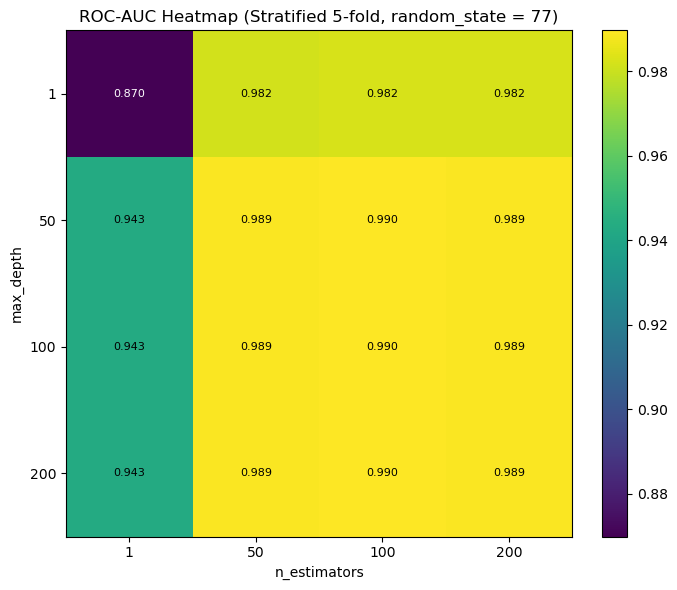

In [15]:
# ----------------------------------------------------------
# 6-e. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏòÅÏó≠ ÌÉêÏÉâ (n_estimators √ó max_depth) + ÌûàÌä∏Îßµ
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 1) Îç∞Ïù¥ÌÑ∞ ---------------------------------------------------------------
X, y = load_breast_cancer(return_X_y=True)

# 2) ÍµêÏ∞®Í≤ÄÏ¶ù Î∂ÑÌï†Í∏∞ -------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

# 3) ÌÉêÏÉâÌï† Í∞í Î¶¨Ïä§Ìä∏ ------------------------------------------------------
n_list = [1, 50, 100, 200]      # Ïó¥(Columns)  : Ìä∏Î¶¨ Í∞úÏàò
d_list = [1, 50, 100, 200]        # Ìñâ(Rows)     : ÏµúÎåÄ ÍπäÏù¥

# 4) Í≤∞Í≥º Ï†ÄÏû•Ïö© ÌñâÎ†¨ (Ìñâ = depth, Ïó¥ = tree Ïàò) ---------------------------
heat = np.empty((len(d_list), len(n_list)))

for row, depth in enumerate(d_list):
    for col, trees in enumerate(n_list):
        model = RandomForestClassifier(
            n_estimators     = trees,
            max_depth        = depth,
            random_state     = 77,
        )
        # Stratified 5-fold ROC-AUC ÌèâÍ∑†
        score = cross_val_score(
            model, X, y,
            cv      = cv,
            scoring = "roc_auc",   # Î¨∏ÏûêÏó¥ ÏßÄÏ†ïÏù¥ Í∞ÄÏû• ÏïàÏ†Ñ
            n_jobs  = -1,
        ).mean()
        heat[row, col] = score

# 5) ÌûàÌä∏Îßµ ---------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(heat, cmap="viridis", origin="upper")

# Ï∂ï Î†àÏù¥Î∏î¬∑ÎààÍ∏à
ax.set_xticks(range(len(n_list)))
ax.set_yticks(range(len(d_list)))
ax.set_xticklabels(n_list)               # n_estimators Í∞í
ax.set_yticklabels([str(d) for d in d_list])   # max_depth Í∞í
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_title("ROC-AUC Heatmap (Stratified 5-fold, random_state = 77)")

# ÏÖÄÎßàÎã§ Ï†êÏàò ÌëúÏãú
for row in range(len(d_list)):
    for col in range(len(n_list)):
        ax.text(
            col, row, f"{heat[row, col]:.3f}",
            ha="center", va="center",
            color="white" if heat[row, col] < 0.90 else "black",
            fontsize=8,
        )

# Ïª¨Îü¨Î∞î + Î†àÏù¥ÏïÑÏõÉ
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()
# ----------------------------- (End of 6-e Î∏îÎ°ù) -----------------------------

In [16]:
# ---------------- 0. Îç∞Ïù¥ÌÑ∞¬∑Ï§ÄÎπÑ ÏΩîÎìú ----------------
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 0-1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú
cancer = load_breast_cancer()
X = cancer.data          # (n_samples, n_features)
y = cancer.target        # Î†àÏù¥Î∏î Î≤°ÌÑ∞

# 0-2) ÌïôÏäµ / ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=77
)

# 0-3) Feature importance Í∏∞Î∞ò Ïù∏Îç±Ïä§ (Top / Bottom)
imp_clf = RandomForestClassifier(random_state=77, n_jobs=-1)
imp_clf.fit(X_train, y_train)

importances   = imp_clf.feature_importances_
indices_desc  = np.argsort(importances)[::-1]      # Ï§ëÏöîÎèÑ ÎÇ¥Î¶ºÏ∞®Ïàú
indices_asc   = indices_desc[::-1]                # Ïò§Î¶ÑÏ∞®Ïàú
# ---------------------------------------------------

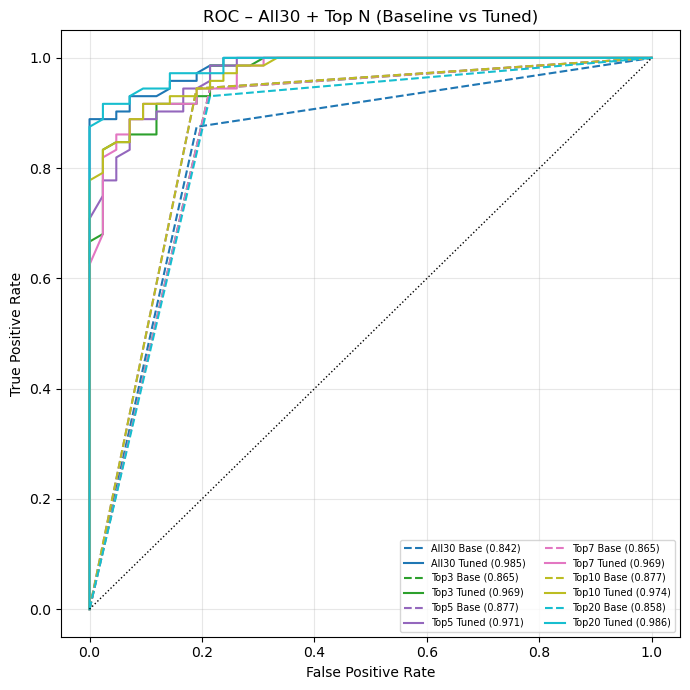

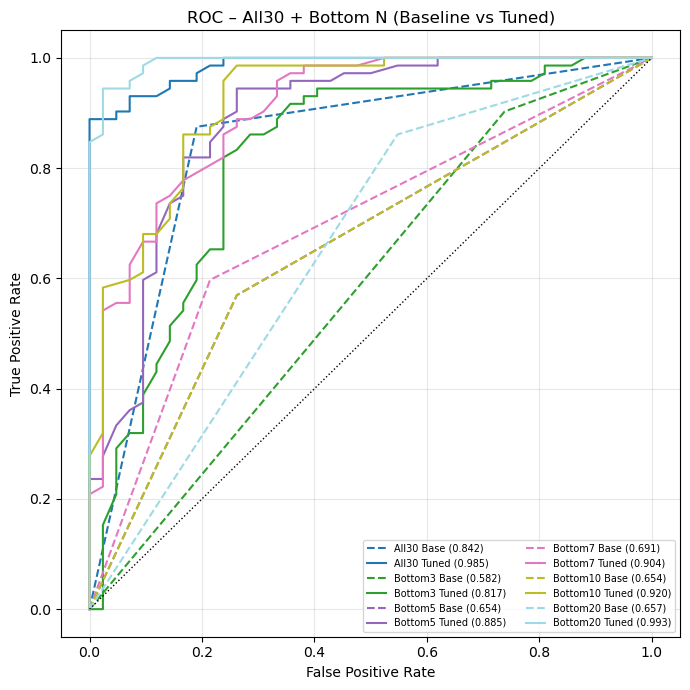

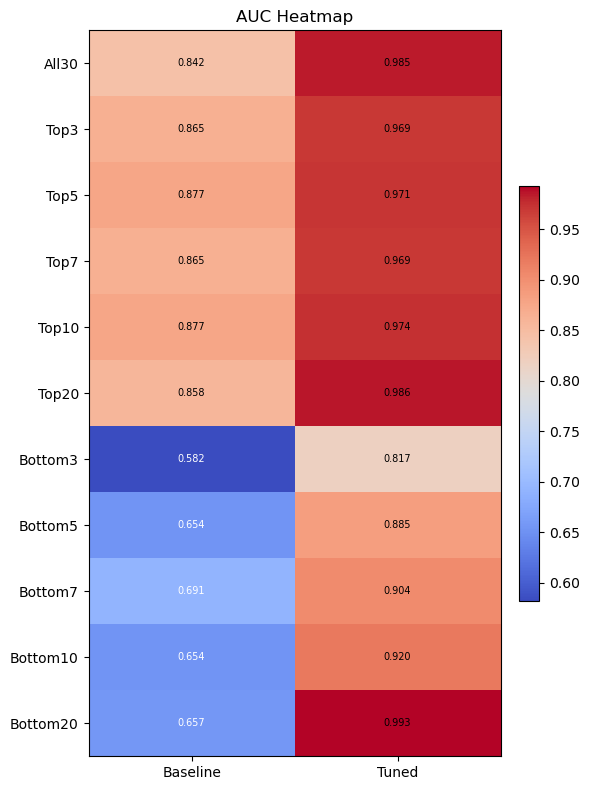

In [17]:
# ----------------------------------------------------------
# 6-g. ROC curve (Baseline & Tuned) + AUC Heatmap
# ----------------------------------------------------------
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ---------- 1) Feature Set Ï†ïÏùò ------------------------------------------
sizes        = [3, 5, 7, 10, 20]
order_labels = ["All30"] \
             + [f"Top{n}"    for n in sizes] \
             + [f"Bottom{n}" for n in sizes]

feature_sets = {
    "All30":     np.arange(X.shape[1]),
    **{f"Top{n}"   : indices_desc[:n] for n in sizes},
    **{f"Bottom{n}": indices_asc[:n]  for n in sizes},
}

# ---------- 2) Îëê Î™®Îç∏ ----------------------------------------------------
baseline_clf = RandomForestClassifier(
    n_estimators = 1,
    max_depth    = 1,
    random_state = 77,
)
tuned_clf = RandomForestClassifier(
    n_estimators = 100,
    max_depth    = 50,
    random_state = 77,
)



# ---------- 3) ROC Îç∞Ïù¥ÌÑ∞ & AUC Ï†ÄÏû• --------------------------------------
roc_base, roc_tuned = {}, {}
auc_mat = np.empty((len(order_labels), 2))  # Ïó¥ 0=Base, 1=Tuned

for i, label in enumerate(order_labels):
    idx = feature_sets[label]

    # ‚îÄ‚îÄ ÌïôÏäµ
    baseline_clf.fit(X_train[:, idx], y_train)
    tuned_clf.fit(X_train[:, idx], y_train)

    # ‚îÄ‚îÄ ÏòàÏ∏° ÌôïÎ•†
    pb = baseline_clf.predict_proba(X_test[:, idx])[:, 1]
    pt = tuned_clf.predict_proba(X_test[:, idx])[:, 1]

    # ‚îÄ‚îÄ ROC
    fpr_b, tpr_b, _ = roc_curve(y_test, pb)
    fpr_t, tpr_t, _ = roc_curve(y_test, pt)
    auc_b, auc_t    = auc(fpr_b, tpr_b), auc(fpr_t, tpr_t)

    roc_base[label]  = (fpr_b, tpr_b, auc_b)
    roc_tuned[label] = (fpr_t, tpr_t, auc_t)
    auc_mat[i]       = [auc_b, auc_t]

# ---------- 4) ROC Curve A : All30 + Top N -------------------------------
top_labels = ["All30"] + [f"Top{n}" for n in sizes]
colors = plt.cm.tab10(np.linspace(0, 1, len(top_labels)))

plt.figure(figsize=(7, 7))
for c, lbl in zip(colors, top_labels):
    fpr_b, tpr_b, A_b = roc_base[lbl]
    fpr_t, tpr_t, A_t = roc_tuned[lbl]
    plt.plot(fpr_b, tpr_b, linestyle="--", color=c,
             label=f"{lbl} Base ({A_b:.3f})")
    plt.plot(fpr_t, tpr_t, linestyle="-",  color=c,
             label=f"{lbl} Tuned ({A_t:.3f})")
plt.plot([0, 1], [0, 1], "k:", lw=1)
plt.title("ROC ‚Äì All30 + Top N (Baseline vs Tuned)")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(fontsize=7, ncol=2, loc="lower right")
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# ---------- 5) ROC Curve B : All30 + Bottom N ----------------------------
bottom_labels = ["All30"] + [f"Bottom{n}" for n in sizes]
colors = plt.cm.tab20(np.linspace(0, 1, len(bottom_labels)))

plt.figure(figsize=(7, 7))
for c, lbl in zip(colors, bottom_labels):
    fpr_b, tpr_b, A_b = roc_base[lbl]
    fpr_t, tpr_t, A_t = roc_tuned[lbl]
    plt.plot(fpr_b, tpr_b, linestyle="--", color=c,
             label=f"{lbl} Base ({A_b:.3f})")
    plt.plot(fpr_t, tpr_t, linestyle="-",  color=c,
             label=f"{lbl} Tuned ({A_t:.3f})")
plt.plot([0, 1], [0, 1], "k:", lw=1)
plt.title("ROC ‚Äì All30 + Bottom N (Baseline vs Tuned)")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(fontsize=7, ncol=2, loc="lower right")
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# ---------- 6) AUC Heatmap ----------------------------------------------
fig, ax = plt.subplots(figsize=(6, 8))
im = ax.imshow(auc_mat, cmap="coolwarm", aspect="auto",
               vmin=auc_mat.min(), vmax=auc_mat.max())

ax.set_xticks([0, 1]); ax.set_xticklabels(["Baseline", "Tuned"])
ax.set_yticks(np.arange(len(order_labels))); ax.set_yticklabels(order_labels)
ax.set_title("AUC Heatmap")

best = auc_mat.max()
for r in range(len(order_labels)):
    for c in range(2):
        v = auc_mat[r, c]
        ax.text(c, r, f"{v:.3f}",
                ha="center", va="center",
                color="white" if v < (auc_mat.min()+auc_mat.max())/2 else "black",
                fontsize=7)

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout(); plt.show()
# ----------------------------- (End of 6-g Î∏îÎ°ù) -----------------------------

[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/opt/homebrew/Caskroom/miniconda/base/envs/sklearn-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


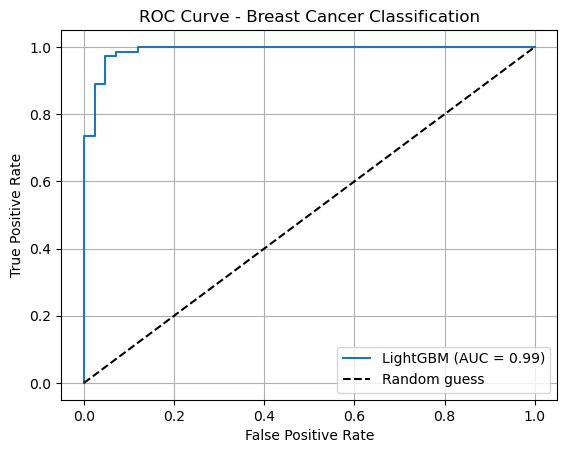

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
data = load_breast_cancer()
X = data.data
y = data.target

# 2. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. LGBM Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ (CPU ÏÇ¨Ïö©)
model = LGBMClassifier(device='cpu', random_state=42)
model.fit(X_train, y_train)

# 4. ÏòàÏ∏° ÌôïÎ•† Í≥ÑÏÇ∞
y_score = model.predict_proba(X_test)[:, 1]

# 5. ROC Í≥°ÏÑ† Í≥ÑÏÇ∞
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 6. ÏãúÍ∞ÅÌôî
plt.figure()
plt.plot(fpr, tpr, label=f"LightGBM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Breast Cancer Classification")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


üîπ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨: {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


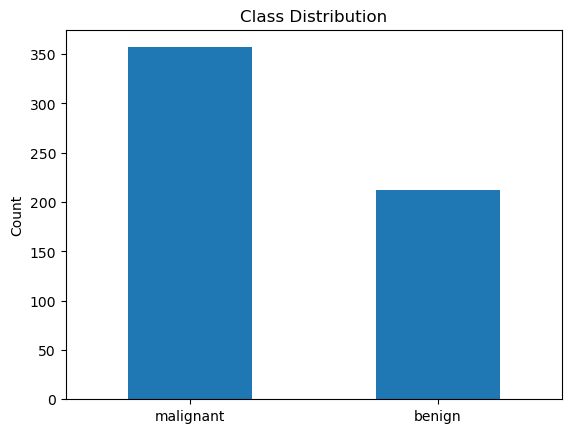

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

# 1-b. ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÌôïÏù∏
unique, counts = np.unique(y, return_counts=True)
class_dist = dict(zip(data.target_names, counts))
print("üîπ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:", class_dist)

# ÏãúÍ∞ÅÌôî
pd.Series(y).value_counts().plot(kind='bar', xticks=[0, 1])
plt.xticks([0, 1], ['malignant', 'benign'], rotation=0)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.show()


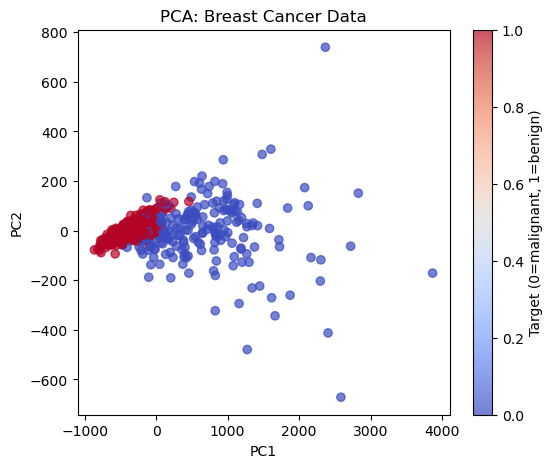

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: Breast Cancer Data")
plt.colorbar(label='Target (0=malignant, 1=benign)')
plt.show()

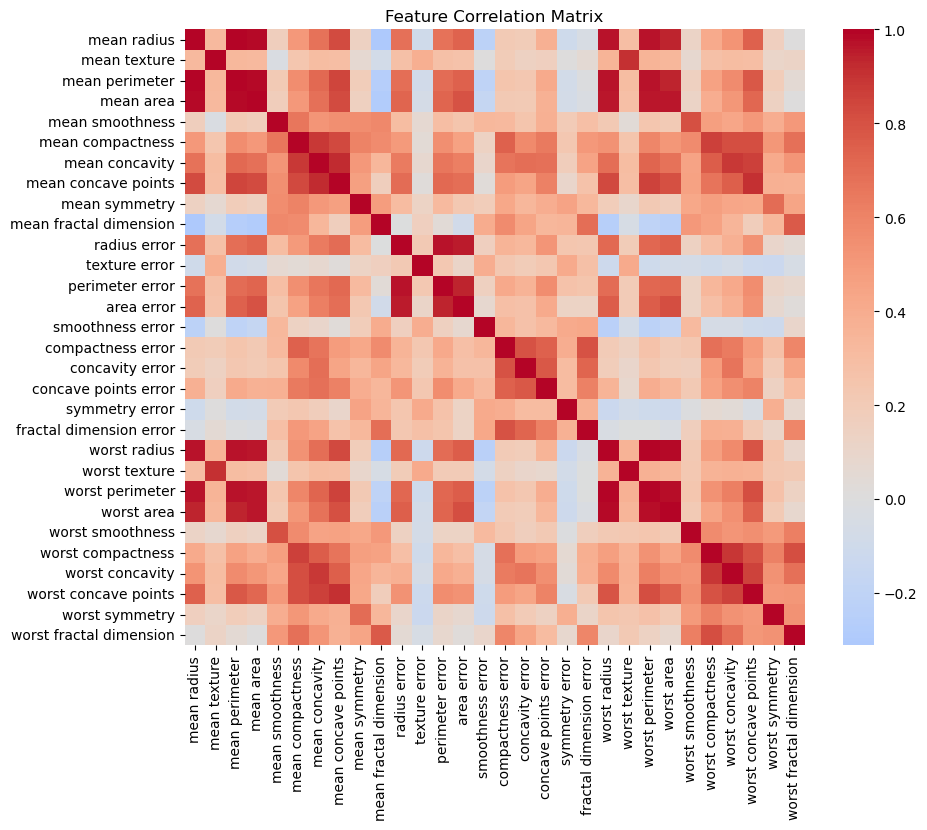

In [ ]:
import seaborn as sns
df = pd.DataFrame(X, columns=data.feature_names)
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()
# Ïù¥ ÌûàÌä∏ÎßµÏùÄ "ÏùòÎØ∏ ÏûàÎäî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎßéÏù¥ Ï°¥Ïû¨ÌïòÎ©∞, Íµ¨Ï°∞Ï†ÅÏúºÎ°ú Ïûò Ï†ïÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞"ÏûÑÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
# ÎûúÎç§ÌïòÍ±∞ÎÇò ÌòºÎûÄÏä§Îü¨Ïö¥ Ìå®ÌÑ¥Ïù¥ ÏóÜÍ≥†, Í∞ïÌïú ÏÉÅÍ¥Ä Í∑∏Î£πÏù¥ Î™ÖÌôïÌïòÍ≤å ÎÇòÌÉÄÎÇòÎØÄÎ°ú ÎÖ∏Ïù¥Ï¶àÍ∞Ä Ï†ÅÏùÄ Ìé∏ÏûÖÎãàÎã§.

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
scores = cross_val_score(model, X, y, cv=5)

print("üîπ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÌèâÍ∑† Ï†ïÌôïÎèÑ:", scores.mean())
# ÎßåÏïΩ Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ°úÎèÑ 90% Ïù¥ÏÉÅ Ï†ïÌôïÎèÑÍ∞Ä ÎÇòÏò®Îã§Î©¥,
# Í≥†Ï∞®Ïõê ÎπÑÏÑ†Ìòï Î™®Îç∏ ÏóÜÏù¥ÎèÑ Ïûò ÎßûÎäî ‚Üí Ï¶â, noiseÍ∞Ä Ï†ÅÍ≥† Î∂ÑÎ•òÍ∞Ä Ïûò ÎêòÎäî Íµ¨Ï°∞Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå

üîπ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÌèâÍ∑† Ï†ïÌôïÎèÑ: 0.9507995652848935
